In [197]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [198]:
# In order to work with feather files , we need pyarrow package
#!pip install pyarrow

In [199]:
# Loading the dataset
df = pd.read_feather("Sales_data.ftr")
df.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Data cleaning and formatting

In [200]:
# Checking the shape of the dataset
df.shape

(186850, 6)

In [201]:
# Checking for null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Observations: There are 545 null values in every column. So, let's remove them.

In [202]:
# Removing all the missing values
df = df.dropna(how="all")

In [203]:
# Checking the missing values with percentage and displaying them as a dataframe
missing =df.isna().sum().sort_values(ascending=False)
percent = df.isna().sum()/df.isna().count().sort_values(ascending=False)
missing_data = pd.concat([missing,percent],axis=1,keys=['missing','percent'])
missing_data

,missing,percent
Order ID,0,0.0
Product,0,0.0
Quantity Ordered,0,0.0
Price Each,0,0.0
Order Date,0,0.0
Purchase Address,0,0.0


In [204]:
# Checking for null values if any
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [205]:
# Checking for duplicate values
df.duplicated().sum()

618

In [206]:
# Checking for duplicate rows
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [207]:
# Dropping all the duplicate rows
df = df.drop_duplicates() 

In [208]:
df.shape

(185687, 6)

In [209]:
# Checking for duplicate values
df.duplicated().sum()

0

##### Observations: There are no duplicates in the dataset

#### Looking for Best Month For Sales

In [210]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Adding month column

In [211]:
df['Order Date'][0]

'04/19/19 08:46'

In [212]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [213]:
'04/19/19 08:46'.split(' ')[0].split('/')[0] ## extracting month from "Order Date"

'04'

In [214]:
df['Order Date'][0].split('/')[0] ## extracting month from "Order Date"

'04'

df['Order Date'][0].split(' ')[0].split('/')[0]

In [215]:
def return_month(x):
    return x.split('/')[0]

In [216]:
df['Month'] = df['Order Date'].apply(return_month) ## applying return_month function on top of "Order Date" feature

In [217]:
df['Month'].value_counts() ## checking unique months 

12            24944
10            20249
04            18257
11            17544
05            16552
03            15128
07            14275
06            13535
02            11957
08            11943
09            11603
01             9699
Order Date        1
Name: Month, dtype: int64

#### Observations: The whole Month Column has numerical values except one ('Order Date' ) value. This popus an error while changing its datatype to integer. So,let's skip it.

In [218]:
df = df[df.Month != 'Order Date']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [219]:
df['Month'] = df['Month'].astype(int)

In [220]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [221]:
# Converting object to numericals
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [222]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [223]:
## Adding sales feature
df['sales'] = df['Quantity Ordered'] * df['Price Each'] 
df['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

In [224]:
df.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

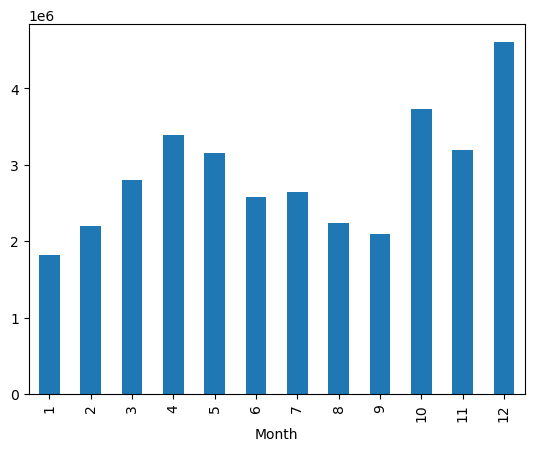

In [225]:
df.groupby(['Month'])['sales'].sum().plot(kind='bar');

#### Observation: December has more sales. So, we can say that December is the best month of sales

In [226]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [227]:
df['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [228]:
df['Purchase Address'][0].split(',')[1] ## extracting city from "Purchase Address"

' Dallas'

In [229]:
def return_address(x):
    return x.split(',')[1]

In [230]:
df['city'] = df['Purchase Address'].apply(return_address)
df.city

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

df['city'] = df['Purchase Address'].str.split(',').str.get(1)
df['city']

In [231]:
df.city.value_counts()

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

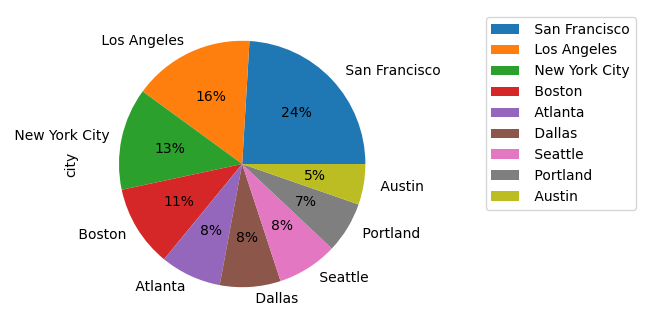

In [232]:
plt.figure(figsize = (10,4))
df['city'].value_counts().plot.pie(autopct = '%1.0f%%')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right');

#### Observations: San Francisco, Los Angeles and New York are the Top 3 cities which has max order 

In [233]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [234]:
count_df = df.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})

In [235]:
count_df = count_df.reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [236]:
products = count_df['Product'].values

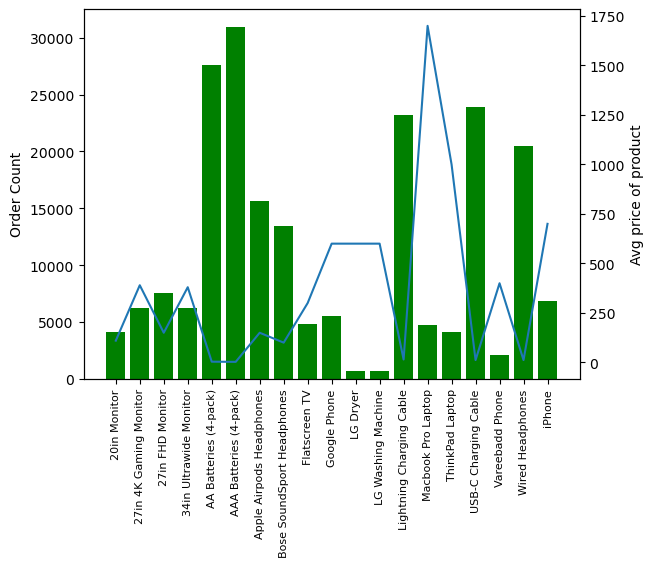

In [237]:
fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()

ax1.bar(count_df['Product'] , count_df['Quantity Ordered'] , color='g')
ax2.plot(count_df['Product'] , count_df['Price Each'] )
ax1.set_xticklabels(products , rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product');

#### Observations: 
#### The top selling product is 'AAA Batteries'. 
#### The top selling products seems to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

## 5.. Understanding Trend of the most sold product ? 

In [238]:
df['Product'].value_counts()[0:5].index   ## Top 5 most sold products ..

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [239]:
df['Product'].value_counts()[0:5]

USB-C Charging Cable        21859
Lightning Charging Cable    21610
AAA Batteries (4-pack)      20612
AA Batteries (4-pack)       20558
Wired Headphones            18849
Name: Product, dtype: int64

In [240]:
top5_products = df['Product'].value_counts()[0:5].index

In [241]:
df['Product'].isin(top5_products)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [242]:
top5_products = df[df['Product'].isin(top5_products)]
top5_products.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [243]:
top5_products.groupby(['Month' , 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [244]:
pivot = top5_products.groupby(['Month' , 'Product']).size().unstack()

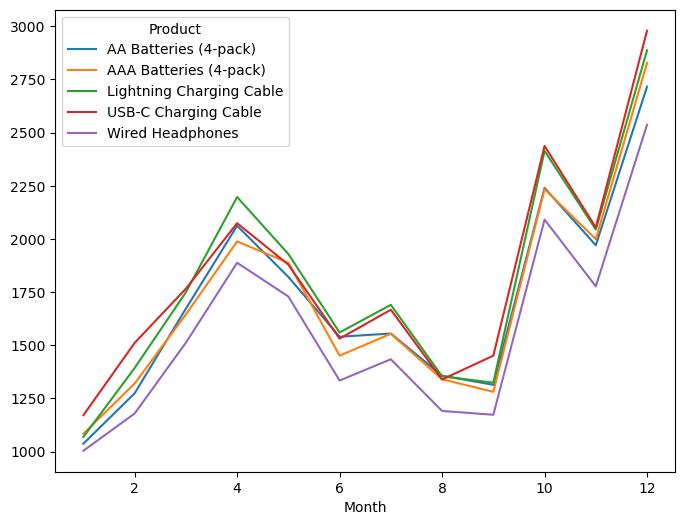

In [245]:
pivot.plot(figsize=(8,6));

##### Observations: Most of the products have been sold in October , November , December

## Products Most Often Sold Together

In [246]:
df.columns 

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [247]:
df['Order ID'] 

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [248]:
df['Order ID'].duplicated()

0         False
2         False
3         False
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 185686, dtype: bool

#### There are multiple duplicate 'order id's. We are keeping it because a person can buy more than one product in a single order.`

In [249]:
df_duplicated = df[df['Order ID'].duplicated(keep=False)]

In [250]:
df_duplicated ## dataframe in which we have those Order Ids who have purchased more products !

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [251]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [253]:
## Merging dataframes
dup_products_df = df_duplicated.merge(dup_products , how='left' , on='Order ID')  
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [254]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID']) # lets drop out all duplicate Order ID

In [255]:
no_dup_df.shape

(6879, 10)

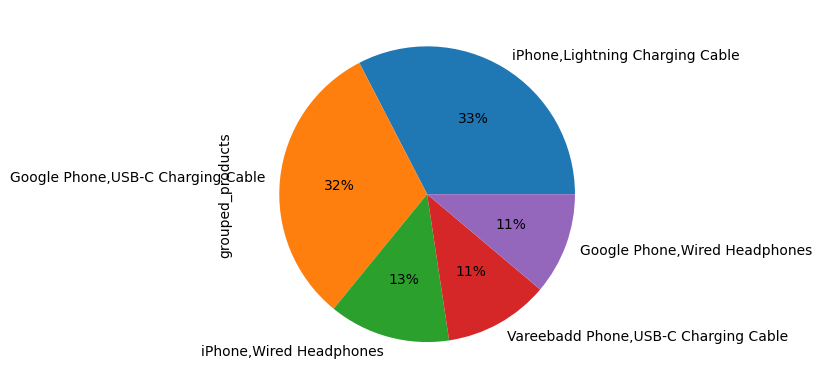

In [257]:
pd.value_counts(no_dup_df['grouped_products'])[0:5].plot(kind='pie' , autopct = '%1.0f%%');

#### Observations: Iphone and Lightning Charging cable sold the most